# Choropleth maps measuring sportiness index by region in the Italian context

**Idea of the output of the pipeline**

In [3]:
from IPython.display import Image


In [4]:
import os
#os.getcwd()

In [5]:
import numpy as np
import pandas as pd
import requests
import plotly.express as px


Here we load all the data that will help to build a sportiness index (we need to add sport facilities per 100000 inhabitants and gym accesses)

In [6]:
# carico confini regionali
geojson_url = 'https://raw.githubusercontent.com/AlbGri/AlbGri.github.io/master/assets/files/Openpolis/geojson/limits_IT_regions.geojson'
italy_regions_geo = requests.get(geojson_url).json()


In [7]:
#Loading simulated mobile apps data
stepsdf = pd.read_csv("stepsaggregated.csv")
squatsdf = pd.read_csv("squatsaggregated.csv")
pushupsdf = pd.read_csv("pushupsaggregated.csv")
#Loading daily Google trends data (research interest in sport)
googletrendsdf = pd.read_csv("researchinterestsport.csv")

In [8]:
#Re-aggregating data about different activities into one table 
#(it can be useful to create interactive multiple map/dashboard)
activitydf = pd.concat([stepsdf,squatsdf,pushupsdf],axis=1)
del activitydf['region']
activitydf

,steps,squats,pushups
0,4379.75484,31.501154,16.486795
1,3230.39198,23.500256,12.513077
2,3166.57721,22.501923,12.485256
3,2933.24814,21.503846,11.499359
4,5051.28323,36.515385,19.491410
5,5057.61543,36.545641,19.519359
6,4681.02205,33.499744,18.517436
7,4854.99442,35.494231,18.552949
8,5258.51714,38.520897,20.496923
9,4659.54383,33.505256,17.502564


In [9]:
#Putting regions of activity dataframes into a list
regions = list(stepsdf.region)

In [10]:
#Storing sorted regions with correct names for maps  
regionsgeojson = sorted(['Piemonte', 'Trentino-Alto Adige/Südtirol', 'Lombardia', 'Puglia', 'Basilicata', 
           'Friuli-Venezia Giulia', 'Liguria', "Valle d'Aosta/Vallée d'Aoste", 'Emilia-Romagna',
           'Molise', 'Lazio', 'Veneto', 'Sardegna', 'Sicilia', 'Abruzzo',
           'Calabria', 'Toscana', 'Umbria', 'Campania', 'Marche'])

In [11]:
#Applying regions with correct names to the dataframes
stepsdf['reg_name'] = regionsgeojson
squatsdf['reg_name']  = regionsgeojson
pushupsdf['reg_name'] = regionsgeojson
activitydf['reg_name'] = regionsgeojson
googletrendsdf['reg_name'] = regionsgeojson

In [12]:
# Choropleth representing the length of region names
#fig = px.choropleth(data_frame=squatsdf, 
                    #geojson=italy_regions_geo, # anche il geojson_url gli si può passare
                    #locations='reg_name',      # name of dataframe column
                    #featureidkey='properties.reg_name',  # feature object locations
                    #color='squats',
                    #color_continuous_scale="Portland",
                    #scope="europe",
                   #)
#fig.update_geos(showcountries=False, showcoastlines=False, showland=False, fitbounds="locations")
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

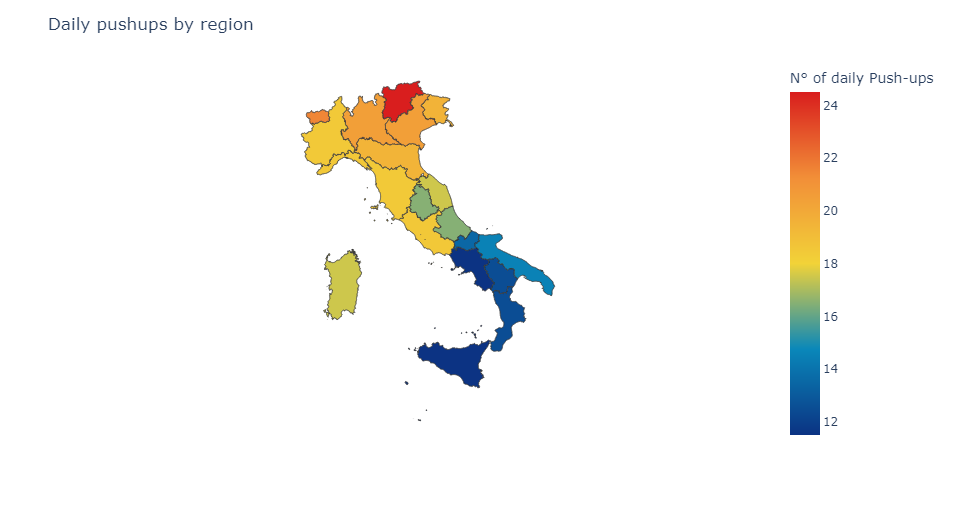

In [14]:
# Choropleth representing pushups by region
fig = px.choropleth(data_frame=pushupsdf, 
                    geojson=italy_regions_geo, # anche il geojson_url gli si può passare
                    locations='reg_name',      # name of dataframe column
                    featureidkey='properties.reg_name',  # feature object locations
                    color='pushups',
                    color_continuous_scale="Portland",
                    scope="europe",
                    labels = {'pushups':'N° of daily Push-ups'}
                   )
fig.update_geos(showcountries=False, showcoastlines=False, showland=False, fitbounds="locations")
fig.update_layout(title_text= "Daily pushups by region")#, margin={"r":100,"t":100,"l":50,"b":50})
# fig.show().png')

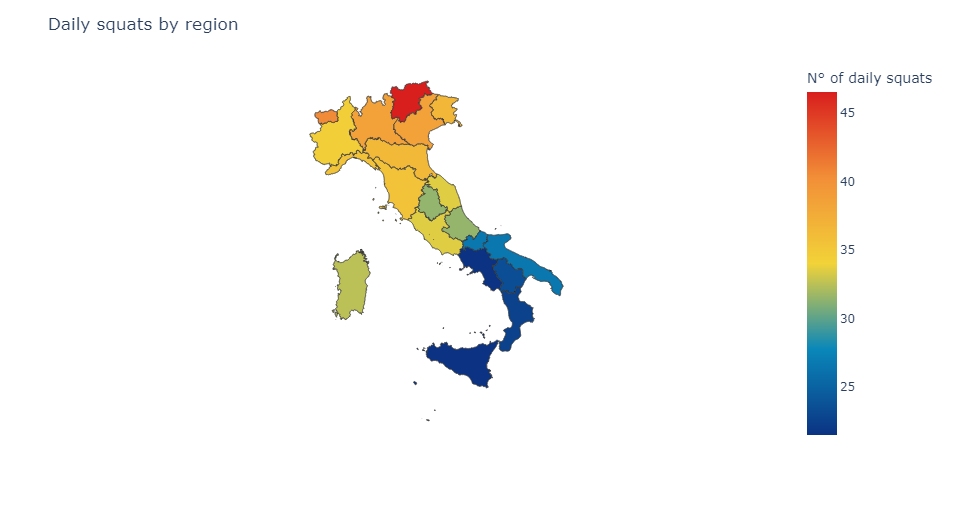

In [16]:
# Choropleth representing squats by region
fig = px.choropleth(data_frame=squatsdf, 
                    geojson=italy_regions_geo, # anche il geojson_url gli si può passare
                    locations='reg_name',      # name of dataframe column
                    featureidkey='properties.reg_name',  # feature object locations
                    color='squats',
                    color_continuous_scale="Portland",
                    scope="europe",
                    labels = {'squats':'N° of daily squats'}
                   )
fig.update_geos(showcountries=False, showcoastlines=False, showland=False, fitbounds="locations")
fig.update_layout(title_text= "Daily squats by region")#, margin={"r":100,"t":100,"l":50,"b":50})
# fig.show()

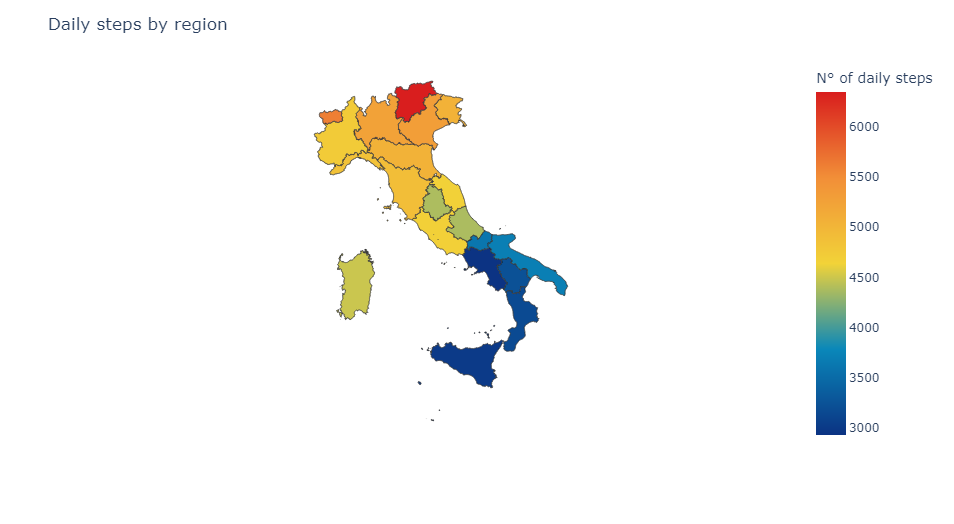

In [19]:
# Choropleth representing steps by region
fig = px.choropleth(data_frame=stepsdf, 
                    geojson=italy_regions_geo, # anche il geojson_url gli si può passare
                    locations='reg_name',      # name of dataframe column
                    featureidkey='properties.reg_name',  # feature object locations
                    color='steps',
                    color_continuous_scale="Portland",
                    scope="europe",
                    labels = {'steps':'N° of daily steps'}
                   )
fig.update_geos(showcountries=False, showcoastlines=False, showland=False, fitbounds="locations")
fig.update_layout(title_text= "Daily steps by region")#, margin={"r":100,"t":100,"l":50,"b":50})
# fig.show()

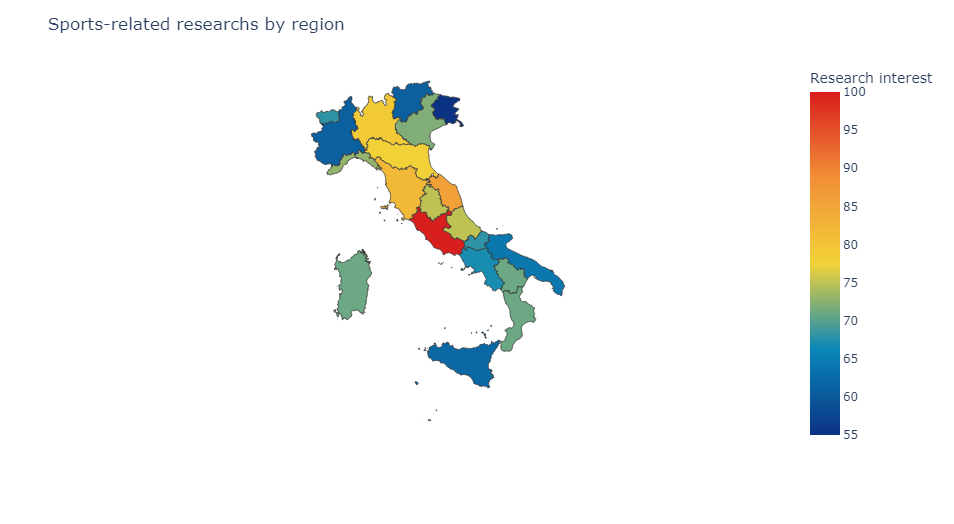

In [20]:
# Choropleth representing sports-related researchs by region
fig = px.choropleth(data_frame=googletrendsdf, 
                    geojson=italy_regions_geo, # anche il geojson_url gli si può passare
                    locations='reg_name',      # name of dataframe column
                    featureidkey='properties.reg_name',  # feature object locations
                    color='sport',
                    color_continuous_scale="Portland",
                    scope="europe",
                    labels = {'sport':'Research interest'}
                   )
fig.update_geos(showcountries=False, showcoastlines=False, showland=False, fitbounds="locations")
fig.update_layout(title_text= "Sports-related researchs by region")#, margin={"r":100,"t":100,"l":50,"b":50})
# fig.show()

In [21]:
#Creating a standardization function to standardize our data and to create a single index
def standardize(x):
    return round((x-x.mean())/x.std(),2)

In [22]:
#Creating copies of our data
stepsdfstd = stepsdf.copy(deep=True)
squatsdfstd = squatsdf.copy(deep=True)
pushupsdfstd = pushupsdf.copy(deep=True)
googletrendsdfstd = googletrendsdf.copy(deep=True)
#Standardizing copies of our data
stepsdfstd.steps =  standardize(stepsdfstd.steps)
squatsdfstd.squats =  standardize(squatsdfstd.squats)
pushupsdfstd.pushups =  standardize(pushupsdfstd.pushups)
googletrendsdfstd.sport = standardize(googletrendsdfstd.sport)

In [23]:
#Averaging standardized column into one single column (sportiness index)
sportindexbyregion = (round((stepsdfstd.steps + squatsdfstd.squats + pushupsdfstd.pushups + googletrendsdfstd.sport) / 4 , 2))

In [24]:
#Creating a dataset for sportiness index
sportinessdf = pd.DataFrame()
sportinessdf['reg_name'] = regionsgeojson
sportinessdf['sportiness'] = sportindexbyregion

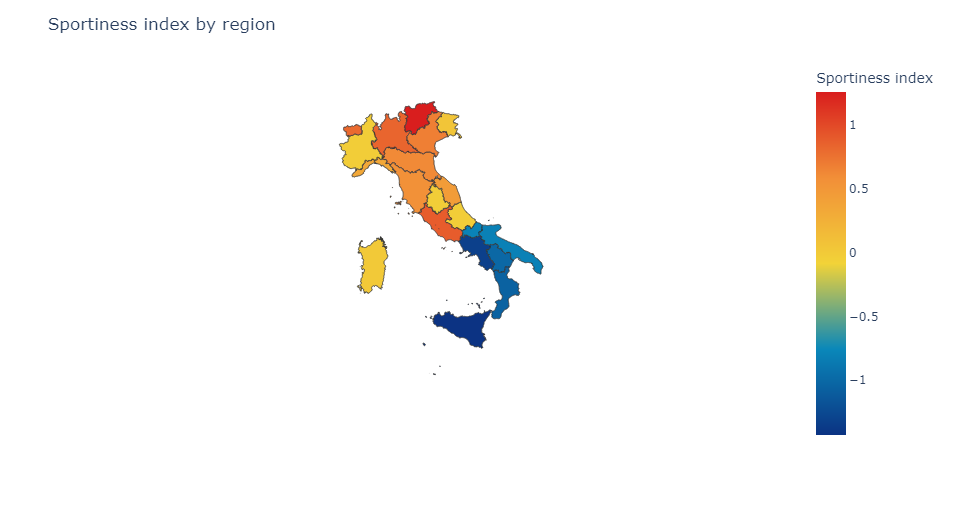

In [26]:
# Choropleth representing sportiness index by region
fig = px.choropleth(data_frame=sportinessdf, 
                    geojson=italy_regions_geo, # anche il geojson_url gli si può passare
                    locations='reg_name',      # name of dataframe column
                    featureidkey='properties.reg_name',  # feature object locations
                    color='sportiness',
                    color_continuous_scale="Portland",
                    scope="europe",
                    labels = {'sportiness':'Sportiness index'}
                   )
fig.update_geos(showcountries=False, showcoastlines=False, showland=False, fitbounds="locations")
fig.update_layout(title_text= "Sportiness index by region")#, margin={"r":100,"t":100,"l":50,"b":50})
# fig.show()